In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Bước 1: Tải dữ liệu dulieuxettuyendaihoc.csv và hiển thị các dòng dữ liệu
data = pd.read_csv('dulieuxettuyendaihoc.csv')

data.rename(columns={'TOANLOGICPHANTICH':'LOGIC'},inplace=True)

data=data[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'GT','LOGIC']]
# Tập dữ liệu Input(đặc trưng) và ouput (mục tiêu)
X= data[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'GT']].values 
y= data[['LOGIC']].values

In [2]:
# Bước 2: EDA dữ liệu
data.describe()

,T1,T2,T3,T4,T5,T6,LOGIC
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000
mean,5.946000,6.374000,6.383000,6.291000,6.717000,6.9370,4.255000
std,1.608338,1.561443,1.574484,1.469563,1.478059,1.3632,1.060053
min,2.400000,2.800000,2.300000,2.900000,3.000000,3.7000,1.500000
25%,5.000000,5.300000,5.175000,5.300000,5.800000,6.0000,3.500000
50%,5.850000,6.250000,6.650000,6.350000,6.800000,7.1000,4.125000
75%,7.200000,7.525000,7.500000,7.600000,7.800000,8.0000,4.750000
max,9.300000,9.600000,9.500000,9.400000,9.500000,9.5000,8.000000


In [3]:
data['GT'] = data['GT'].apply(lambda x: 1 if x == 'M' else 0)

In [4]:
# Bước 3: Chia tập dữ liệu thành train và test
X = data[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'GT']]
y = data['LOGIC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [5]:
# Bước 4: Transform dữ liệu input trên tập train
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

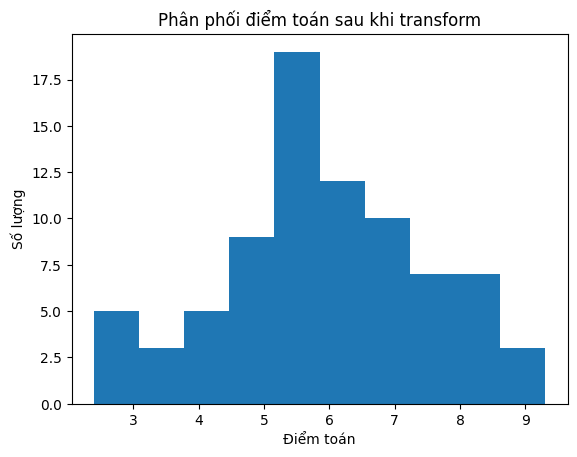

In [6]:
# Bước 5: EDA dữ liệu điểm toán sau khi transform
plt.hist(X_train_poly[:, 1])  # Vẽ biểu đồ phân phối điểm toán
plt.xlabel('Điểm toán')
plt.ylabel('Số lượng')
plt.title('Phân phối điểm toán sau khi transform')
plt.show()

In [7]:
# Bước 6: Chuẩn hóa dữ liệu đầu vào trên tập train
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)

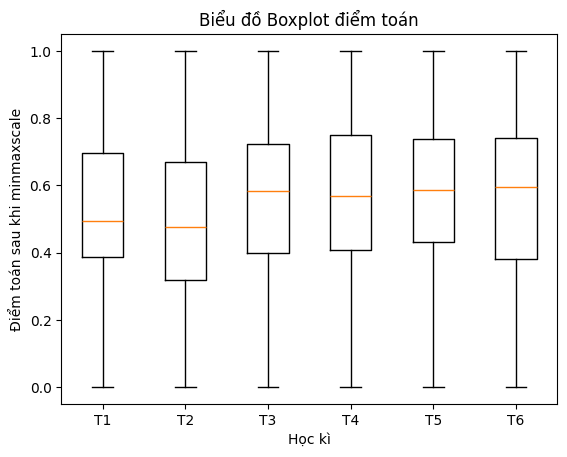

In [8]:

# Bước 7: EDA dữ liệu điểm toán sau khi minmaxscale
plt.boxplot(X_train_scaled[:, 1:7], labels=['T1', 'T2', 'T3', 'T4', 'T5', 'T6'])
plt.xlabel('Học kì')
plt.ylabel('Điểm toán sau khi minmaxscale')
plt.title('Biểu đồ Boxplot điểm toán')
plt.show()

In [9]:
# Bước 8: Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
# Bước 9: Đánh giá mô hình trên tập train và test
X_test_poly = poly.transform(X_test)
X_test_scaled = scaler.transform(X_test_poly)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('MAE trên tập train:', mae_train)
print('MAE trên tập test:', mae_test)

MAE trên tập train: 0.6185152318219463
MAE trên tập test: 1.0522702760902314


In [11]:
# Bước 10: Dự báo điểm LOGIC
new_data = pd.DataFrame({
    'T1': [5.0],
    'T2': [6.5],
    'T3': [7.0],
    'T4': [7.0],
    'T5': [6.5],
    'T6': [6.0],
    'GT': ['1']
})

new_data_poly = poly.transform(new_data)
new_data_scaled = scaler.transform(new_data_poly)
logic_score = model.predict(new_data_scaled)
print('Điểm thi LOGIC dự báo:', logic_score)

Điểm thi LOGIC dự báo: [3.32615445]
